# HW Unsupervised Supervised Learning 

### Agi Rahmawandi <br> Batch 57

## Airline Customer Value Analysis Case

### Dataset ini berisi data customer sebuah perusahaan penerbangan dan beberapa fitur yang dapat menggambarkan value dari customer tersebut


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn
import xgboost
import sys
print("Versi Pandas:", pd.__version__)
print("Versi NumPy:", np.__version__)
print("Versi Matplotlib:",sns.__version__)
print("Versi Scikit-learn:", sklearn.__version__)



Versi Pandas: 2.2.3
Versi NumPy: 2.2.5
Versi Matplotlib: 0.13.2
Versi Scikit-learn: 1.6.1


In [134]:
df = pd.read_csv('dataset/flight.csv')

In [135]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [137]:
df_1 = df.copy()
df_1["total_revenue"] = df_1[["SUM_YR_1","SUM_YR_2"]].sum(axis=1, skipna=True)
df_1["LAST_FLIGHT_DATE"] = pd.to_datetime(df_1["LAST_FLIGHT_DATE"], errors="coerce")

### 1 .Berapa banyak customer yang melakukan penerbangan dalam setahun terkahir?

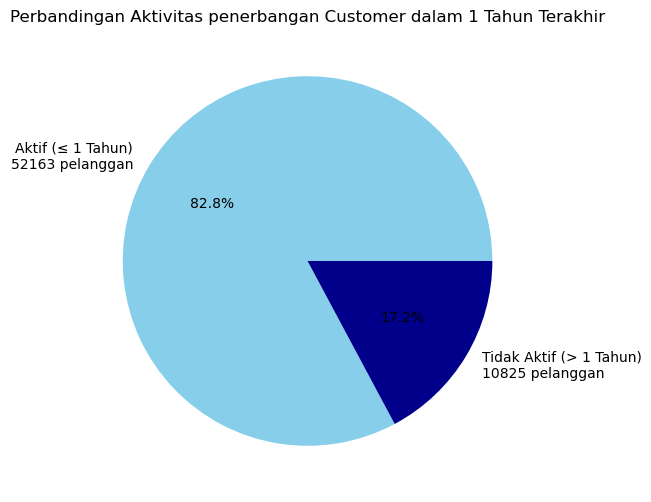

np.int64(52163)

In [138]:
# Hitung jumlah customer per kategori
aktif_count = (df_1['LAST_TO_END'] <= 365).sum()
tidak_aktif_count = (df_1['LAST_TO_END']  > 365).sum()

# Data untuk pie chart
counts = [aktif_count, tidak_aktif_count]
labels = [
    f"Aktif (≤ 1 Tahun)\n{aktif_count} pelanggan",
    f"Tidak Aktif (> 1 Tahun)\n{tidak_aktif_count} pelanggan"
]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["skyblue", "darkblue"])
plt.title("Perbandingan Aktivitas penerbangan Customer dalam 1 Tahun Terakhir")
plt.show()
aktif_count

### 2.Customer dengan Tier/peringkat apa yang sering melakukan penerbangan ?

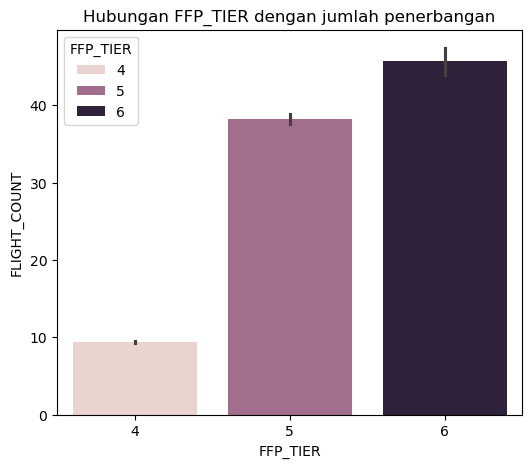

In [139]:

plt.figure(figsize=(6,5))
sns.barplot(data=df_1, x="FFP_TIER", y="FLIGHT_COUNT", hue='FFP_TIER')
plt.title("Hubungan FFP_TIER dengan jumlah penerbangan")
plt.show()

### 3. Apakah setiap tahun mengalami penigkatan jumlah penerbangan ?

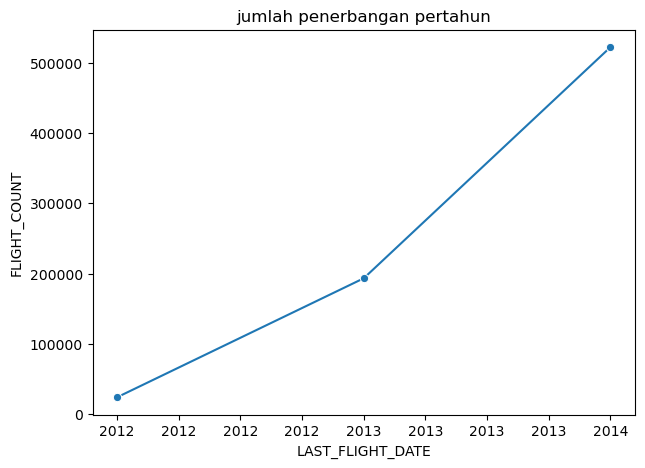

In [140]:

freq_trend = df_1.groupby(df_1["LAST_FLIGHT_DATE"].dt.year)["FLIGHT_COUNT"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=freq_trend, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", marker="o")
plt.title("jumlah penerbangan pertahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### 4. Berapa jumlah penerbangan untuk setiap Tiernya ? 

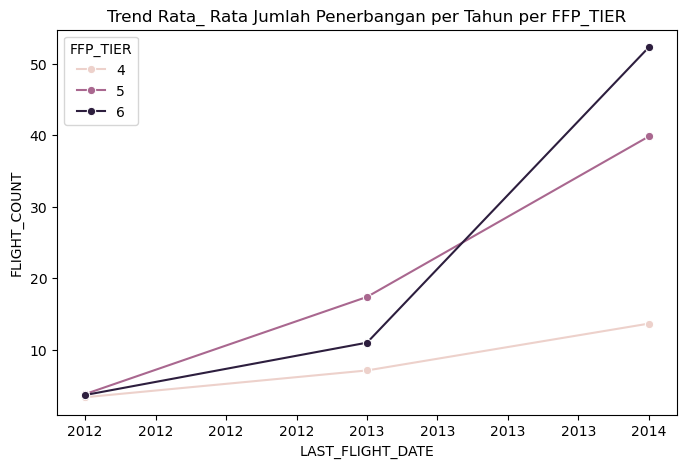

,LAST_FLIGHT_DATE,FFP_TIER,FLIGHT_COUNT
0,2012.0,4,3.356203
1,2012.0,5,3.800000
2,2012.0,6,3.666667
3,2013.0,4,7.100379
4,2013.0,5,17.380282
5,2013.0,6,10.985849
6,2014.0,4,13.649837
7,2014.0,5,39.819803
8,2014.0,6,52.290196


In [141]:
flights_tier_year = df_1.groupby([(df_1["LAST_FLIGHT_DATE"].dt.year),"FFP_TIER"])["FLIGHT_COUNT"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=flights_tier_year, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", hue="FFP_TIER", marker="o")
plt.title("Trend Rata_ Rata Jumlah Penerbangan per Tahun per FFP_TIER")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()
flights_tier_year

### 5.Berapa nilai rata - rata  pedapatan pada setiap Tiernya? 

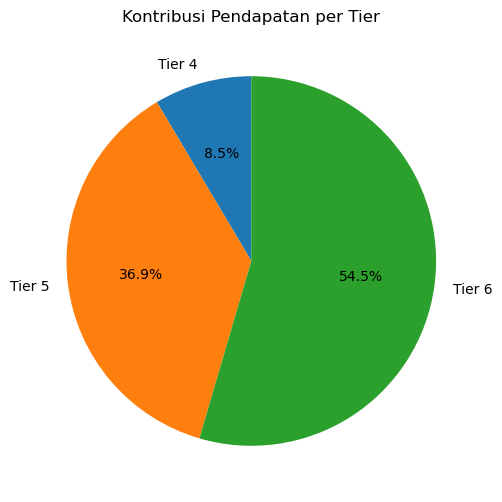

In [142]:
revenue_by_tier = df_1.groupby("FFP_TIER")["total_revenue"].mean().reset_index()

# Visualisasi pie chart semua tier
plt.figure(figsize=(6,6))
plt.pie(revenue_by_tier["total_revenue"],
        labels=[f"Tier {tier}" for tier in revenue_by_tier["FFP_TIER"]],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Kontribusi Pendapatan per Tier")
plt.show()

## 6.Bagaiaman pendapatan pertahunnya apakah mengalami kenaikan ?

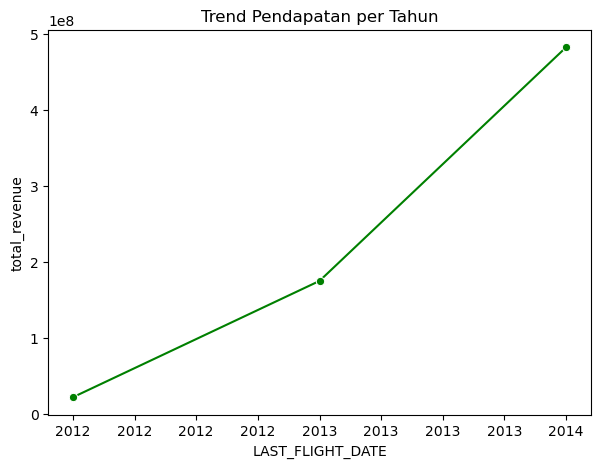

In [143]:
revenue_by_year = df_1.groupby((df_1["LAST_FLIGHT_DATE"].dt.year))["total_revenue"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=revenue_by_year, x="LAST_FLIGHT_DATE", y="total_revenue", marker="o", color="green")
plt.title("Trend Pendapatan per Tahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### Descriptive statistics

In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [145]:
df.describe(include='object').T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


ada beberapa kolom yang memiliki bari yang kosong, dan ada beberapa kolon dengan nilai standar deviasinya besar yang menandakan ada nilai outlier yang cukup tinggi di kolom tersebut.

### Univaiate analisis 


In [146]:
num_col= df.select_dtypes(include=['int64','float64']).columns
obj_col = df.select_dtypes(include=['object']).columns

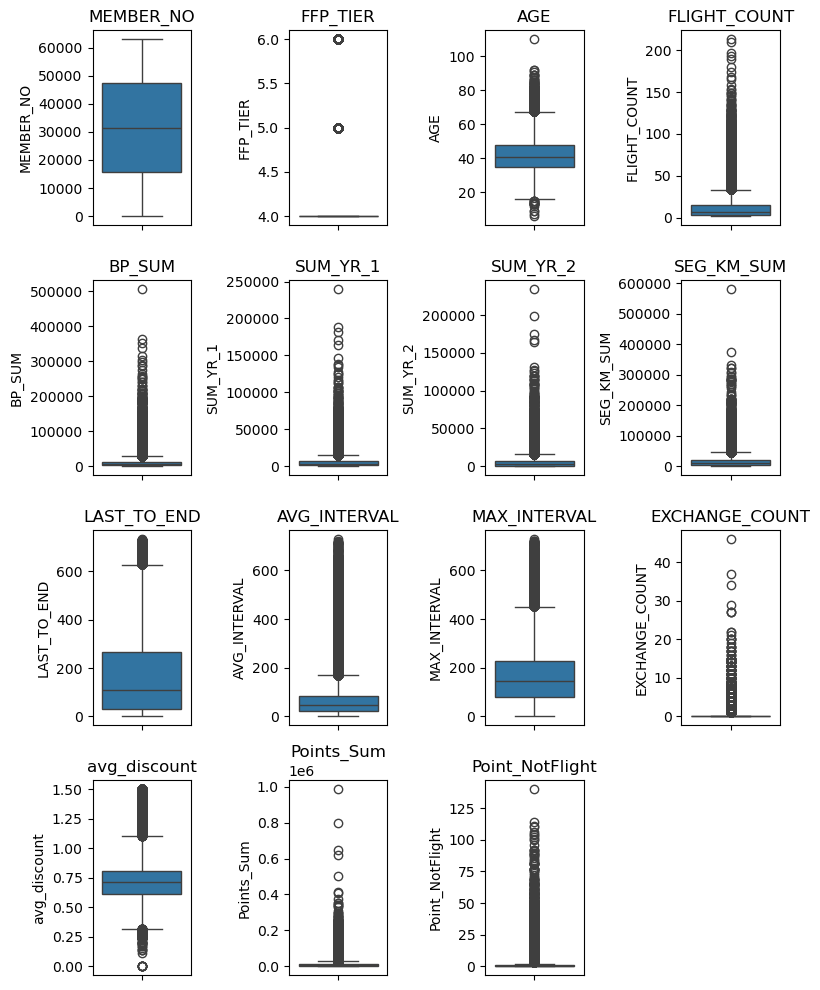

In [147]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_col)/4)), ncols=4, figsize=(8, 10))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

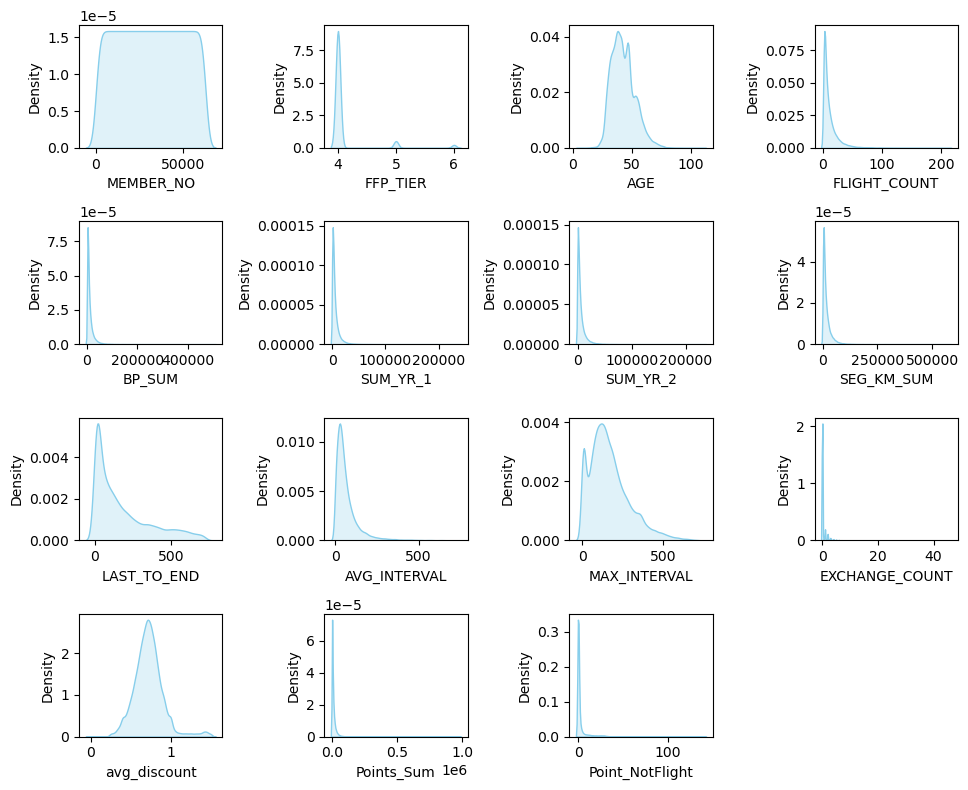

In [148]:
fig, axes = plt.subplots( nrows=int(np.ceil(len(num_col)/4)),ncols=4, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

rata rata data kolom memiliki outlier

###  Multivariate Analysis

<Axes: >

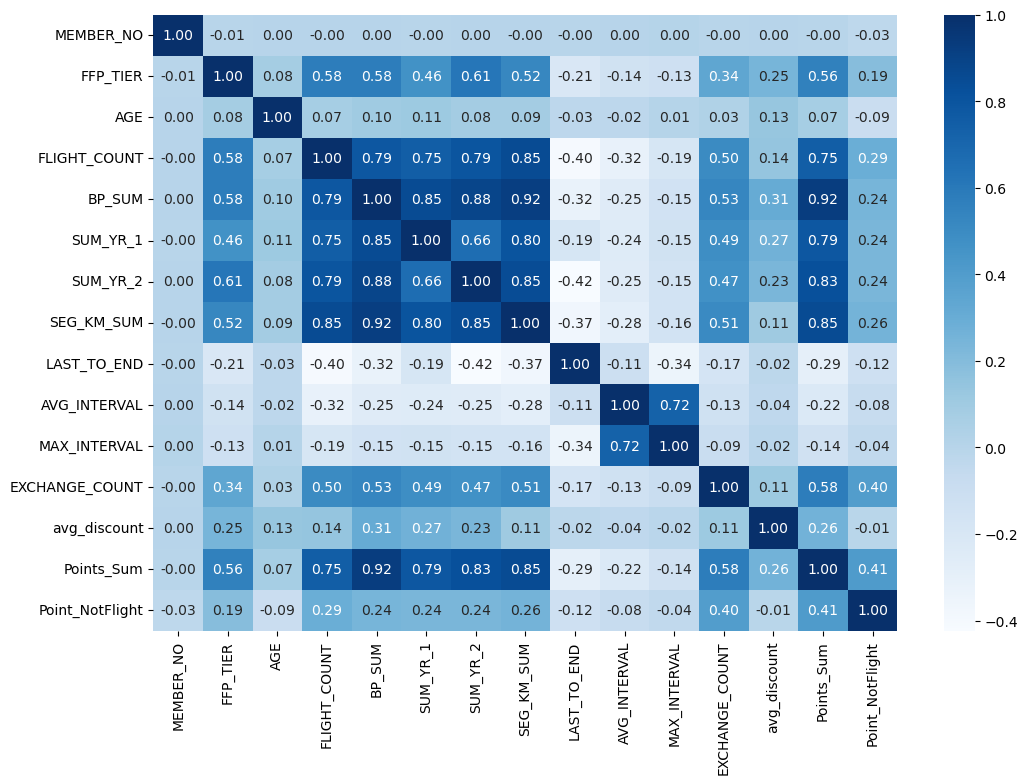

In [149]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

terdapat kolom yang redundan yakni <b>FLIGHT_COUNT,BP_SUM, SUM_YR_1,SUM_YR_2,SEG_KM_SUM , dan Points_Sum</b>

## Preprocessing 

### Handling missing value

In [150]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
FFP_TIER                     0         0.000000
MEMBER_NO                    0         0.000000
FFP_DATE                     0         0.000000
FIRST_FLIGHT_DATE            0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
LAST_FLIGHT_DATE             0         0.000000
LAST_TO_END                  0         0.000000
AVG_INTERVAL                 0         0.000000
MAX_INTERVAL                 0         0.000000
EXCHANGE_COUNT               0         0

akan dilakukan drop kolom WORK_PROVINCE, banyak sekali nilai kosong dikolom tersebut dan melakukan drop baris yang berisi nilai null 

In [151]:
df_cleaned = df.copy()
df_cleaned.shape

(62988, 23)

In [152]:
#deleting rows with missing value
df_cleaned= df_cleaned.drop(columns=['WORK_PROVINCE']).dropna()

In [153]:
df_cleaned.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [154]:
df_cleaned.shape

(59701, 22)

### Handling duplicate data

In [155]:
df_cleaned.duplicated().sum()

np.int64(0)

Tidak ada kolom duplicate

### Data Adjusment

Menyesuaikan type data kolom

In [156]:
df_cleaned["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["FIRST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LAST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["LAST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LOAD_TIME"] = pd.to_datetime(df_cleaned["LOAD_TIME"], errors="coerce")
df_cleaned["FFP_DATE"] = pd.to_datetime(df_cleaned["FFP_DATE"], errors="coerce")

Mengubah data yang sebelumnya bertype object menjadi datetime

## Feature extraction 

In [ ]:
df_cleaned["total_revenue"] = df_cleaned[["SUM_YR_1", "SUM_YR_2"]].sum(axis=1, skipna=True)
df_cleaned["Membership_dur"] = ((df_cleaned["LOAD_TIME"] - df_cleaned["FFP_DATE"]).dt.days)
df_cleaned[["total_revenue","Membership_dur"]].head()

,total_revenue,Membership_dur
111,55717.0,1230
114,50990.0,662
147,46650.0,1828
188,44040.0,1329
201,45294.0,3092


Membuat feature baru <br>
- total_revenue : untuk menghitung total pembayaran kustomer 
- Membership_dur : untuk menghitung berapa lama pelanggan telah menggunakan maskapai ini

## Feature_Selection

Untuk Feature selection disini menggunakan acuan dari teknik analisi RFM, Recency, Frequency dan Monetary.<br>
1. LAST_TO_END (Recency), Melihat sebarapa jauh jarah penerbangan terakhir dilakukan hingga data yang terakhir diambil (dalam hari)
2. FLIGHT_COUNT (Frequency), Menunjukkan frekuensi penerbangan, indikator untuk perilaku perjalanan customer.
3. Total_revenue (Monetary), untuk melihat jumlah total pembayaran dari customer
4. Avg_Discount, untuk melihat repon customer terhadap discount
5. Membership_dur, untuk melihat seberapa lama pelanggan telah menjadi member (dalam hari)

In [158]:
feats = ['LAST_TO_END','FLIGHT_COUNT','total_revenue','avg_discount','Membership_dur']

In [176]:
df_cleaned[feats].head()

,LAST_TO_END,FLIGHT_COUNT,total_revenue,avg_discount,Membership_dur
111,44,31,55717.0,0.723434,1230
114,27,16,50990.0,0.753750,662
147,18,19,46650.0,0.681332,1828
188,179,15,44040.0,0.681333,1329
201,30,16,45294.0,0.665449,3092


### Handling outlier

In [160]:
### Handling Outlier
from scipy import stats

print(f'jumlah baris sebelum memfilter outlier: {len(df_cleaned)}')

filtered_enteries = np.array([True] * len (df_cleaned))

for col in feats:
    zscore = abs(stats.zscore(df_cleaned[col]))
    filtered_enteries = (zscore < 3) & filtered_enteries
    
df_cleaned = df_cleaned[filtered_enteries]

print(f'jumlah baris sesudah memfilter outlier: {len(df_cleaned)}')

jumlah baris sebelum memfilter outlier: 59701
jumlah baris sesudah memfilter outlier: 56739


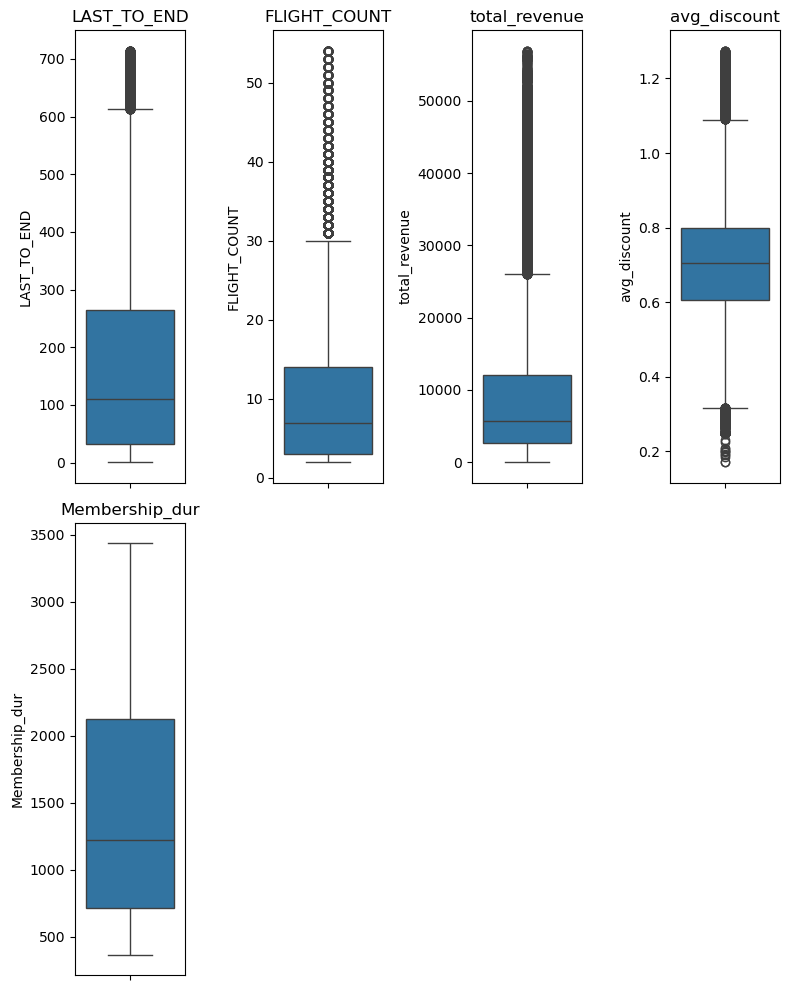

In [161]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(feats)/4)), ncols=4, figsize=(8, 10))
axes = axes.flatten()

for i, col in enumerate(feats):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(feats), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Scaling

In [162]:
from sklearn.preprocessing import StandardScaler

X = df_cleaned[feats].copy() 

# Buat objek scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Untuk hasilnya kembali jadi DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe().T



,count,mean,std,min,25%,50%,75%,max
LAST_TO_END,56739.0,9.617667e-17,1.000009,-0.970486,-0.797853,-0.363484,0.496900,3.000089
FLIGHT_COUNT,56739.0,0.000000e+00,1.000009,-0.845516,-0.744816,-0.342013,0.362890,4.390912
total_revenue,56739.0,-8.014723e-17,1.000009,-0.975560,-0.685646,-0.365146,0.318716,5.155719
avg_discount,56739.0,-5.610306e-16,1.000009,-3.416074,-0.623961,0.008955,0.612673,3.649284
Membership_dur,56739.0,6.411778e-17,1.000009,-1.298498,-0.878759,-0.266591,0.822443,2.396161


## Modeling

Mencari jumlah cluster paling optimal dari K-Means

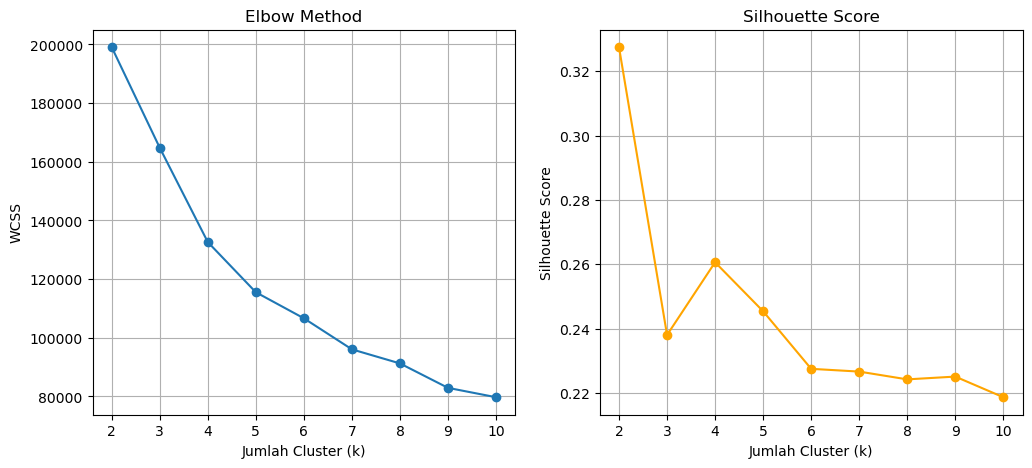

In [163]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)

# Untuk menyimpan hasil
wcss = []  # inertia_
silhouette_avg = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Simpan WCSS
    wcss.append(kmeans.inertia_)
    
    # Hitung silhouette score
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()


In [164]:
df_evaluasi = pd.DataFrame({
    'k': list(range_n_clusters),
    'WCSS': wcss,
    'Silhouette Score': silhouette_avg
})

df_evaluasi

,k,WCSS,Silhouette Score
0,2,199068.995078,0.327493
1,3,164772.998497,0.238033
2,4,132627.307248,0.260636
3,5,115529.669912,0.245410
4,6,106649.977431,0.227516
5,7,96062.906932,0.226655
6,8,91266.456450,0.224237
7,9,82935.938077,0.225101
8,10,79745.543483,0.218687


Dari elbow method terlihat penurunan tajam sampai angka 4 dan setelah itu mulai melandai menunjukan cluseter optimal adalah 4 cluster, dan dari shilhouette score nilai tertinggi adalah 2, namun terlalu sederhana apabila hanya ada 2 cluster, dan mencoba lagi lihat nilai selanjutnya yang tertinggi adalah 4 cluster di angka 0.26. 

K-Means Dengan 4 cluster

In [165]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans_mod= KMeans(n_clusters=4, random_state=0,n_init=10)
labels =kmeans_mod.fit_predict(X_scaled)
df_kmeans = pd.DataFrame(X_scaled, columns=feats)
df_kmeans['Cluster'] = labels
df_kmeans.head()

,LAST_TO_END,FLIGHT_COUNT,total_revenue,avg_discount,Membership_dur,Cluster
0,-0.731027,2.074800,5.024870,0.121872,-0.258172,3
1,-0.825697,0.564292,4.515797,0.316202,-0.941299,3
2,-0.875816,0.866393,4.048402,-0.148011,0.461036,3
3,0.020765,0.463591,3.767318,-0.148002,-0.139106,3
4,-0.808990,0.564292,3.902368,-0.249826,1.981234,3


In [166]:
#Analisis cluster
print("Jumlah anggota tiap cluster:")
df_kmeans['Cluster'].value_counts()

Jumlah anggota tiap cluster:


Cluster
0    22715
2    14055
1    11637
3     8332
Name: count, dtype: int64

Untuk melihat cluster yang telah dibuat datanya kita reduksi dulu dimensinya dengan PCA agar mudah untuk melihat pembagian clusternya

In [167]:
from sklearn.decomposition import PCA

# --- PCA untuk visualisasi ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_plot['Cluster'] = labels
df_pca_plot.head()

,PC1,PC2,Cluster
0,4.618051,-0.190445,3
1,3.313634,-0.060356,3
2,3.445772,-0.292272,3
3,2.523521,-0.029935,3
4,3.441958,-0.063453,3


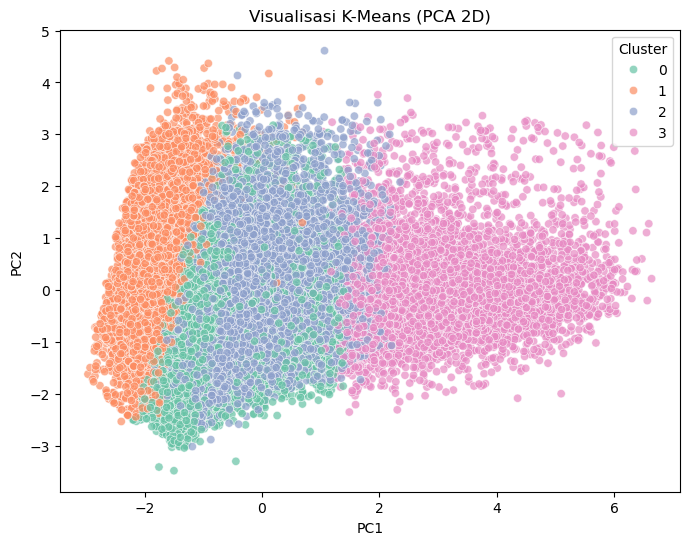

In [168]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca_plot,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title('Visualisasi K-Means (PCA 2D)')
plt.show()

In [169]:
df_cleaned['Cluster'] = labels

In [170]:
df_cleaned.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,total_revenue,Membership_dur,Cluster
111,45117,2010-11-17,2011-02-06,Male,6,Suwanee,US,30.0,2014-03-31,31,...,44,21.433333,89,3,0.723434,162728,39,55717.0,1230,3
114,60020,2012-06-07,2012-06-16,Female,4,LOS ANGELES,US,49.0,2014-03-31,16,...,27,41.866667,150,0,0.753750,133754,1,50990.0,662,3
147,13061,2009-03-29,2009-11-03,Male,4,guangzhou,CN,52.0,2014-03-31,19,...,18,33.944444,119,3,0.681332,81412,3,46650.0,1828,3
188,13606,2010-08-10,2010-08-10,Male,6,MEXICO,MX,40.0,2014-03-31,15,...,179,39.142857,79,0,0.681333,113656,3,44040.0,1329,3
201,11327,2005-10-12,2005-11-29,Male,4,ROWLAND HEIGHTS,US,48.0,2014-03-31,16,...,30,33.133333,132,0,0.665449,122503,0,45294.0,3092,3


In [171]:
df_cleaned['Cluster'].value_counts()

Cluster
0    22715
2    14055
1    11637
3     8332
Name: count, dtype: int64

In [172]:
df_group = df_cleaned.groupby('Cluster')[feats].agg(['mean'])
df_group

,LAST_TO_END,FLIGHT_COUNT,total_revenue,avg_discount,Membership_dur
,mean,mean,mean,mean,mean
Cluster,,,,,
0,105.597887,7.958750,6533.005767,0.680267,874.270922
1,473.569391,3.778207,3430.885709,0.707032,1180.353442
2,118.538883,8.462042,7150.919886,0.709568,2427.776805
3,44.294647,29.548008,27021.746399,0.757948,1710.449712


In [173]:
df_group_sorted = df_group.sort_values(('total_revenue', 'mean'), ascending=False)
df_group_sorted

,LAST_TO_END,FLIGHT_COUNT,total_revenue,avg_discount,Membership_dur
,mean,mean,mean,mean,mean
Cluster,,,,,
3,44.294647,29.548008,27021.746399,0.757948,1710.449712
2,118.538883,8.462042,7150.919886,0.709568,2427.776805
0,105.597887,7.958750,6533.005767,0.680267,874.270922
1,473.569391,3.778207,3430.885709,0.707032,1180.353442


### Interpretasi cluster pelanggan

urutan dari tertinggi<br>
- Cluster 3 :
Jumlahnya sedikit, paling sering melakukan pernerbangan, revenue paling besar, <b>High-Value Customers</b>

- Cluster 2 :
Lumayan sering melakukan penerbangan, revenue sedang, membership paling lama, <b>Loyal Customers</b>

- Cluster 0 : 
Jumlahnya paling banyak, flight count & revenue kecil, <b>Mass Customers (biasa)</b>

- Cluster 1 :
Flight count paling rendah,sudah lama tidak melakukan penerbangan, revenue paling kecil, <b>Inactive Customer</b>

### Rekomendasi Bisnis

Rekomendasi bisnis :
- Fokus utama: pertahankan cluster 3 & dorong cluster 2 menjadi 3 , inilah engine utama untuk revenue perusahaan.
- Cluster 0 bisa dinaikkan value dengan promo massal , walau kontribusi kecil, volume mereka besar.
- Cluster 1 perlu program khusus reaktivasi → kalau gagal, jangan alokasikan terlalu banyak biaya.